In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests
import json
import xgboost
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv(r"C:\Users\002736125\Desktop\PERSONAL\School\Analytics\ALY 6980 CAPSTONE\New_MDS.csv")

C:\Users\002736125\AppData\Local\Temp\ipykernel_7844\1183591788.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\002736125\Desktop\PERSONAL\School\Analytics\ALY 6980 CAPSTONE\New_MDS.csv")


In [3]:
df.head()

,SKU,Parent ASIN,Child ASIN,Brand,product_category,Product Name,FBM Stock,FBA stock,Total Stock,Level,...,US Index of Consumer Sentiment,Federal Funds Effective Rate,US Inflation Rate,GDP,Av. Gas Price,Av house price,S&P 500,Industry Production Index,Consumer Price Index,Personal Consumption Expenditure Price Index [PCE]
0,NaN,B0C4H4GLCH,B001CCW8SM,Zoetis,Apparel,"Quest Gel Moxidectin Horse Dewormer, Early Gra...",NaN,NaN,NaN,Inactive,...,59.0,5.06,4.0,2.707000e+13,3.555,397000.0,4146.17,127.089,32.9,0.1
1,YN-BEACH-TREK,B08ZBVZLRY,B07D5HGH5G,York Nordic - Trek,Apparel,York Nordic Hiking & Walking Poles - Cushion F...,0.0,0.0,0.0,Inactive,...,59.0,5.06,4.0,2.707000e+13,3.555,397000.0,4146.17,127.089,32.9,0.1
2,YN-GREENZEN-TREK-2SCT,B08ZBVZLRY,B00TCOJEDO,York Nordic - Trek,Apparel,York Nordic Hiking & Walking Poles - Cushion F...,0.0,0.0,0.0,Inactive,...,59.0,5.06,4.0,2.707000e+13,3.555,397000.0,4146.17,127.089,32.9,0.1
3,YN-PURPLEHAZE-NORDIC-2SCT,B08ZHCP2Z2,B00TCOJU24,York Nordic - Nordic,Apparel,Nordic Walking Poles - True Classic Nordic Glo...,0.0,0.0,0.0,Inactive,...,59.0,5.06,4.0,2.707000e+13,3.555,397000.0,4146.17,127.089,32.9,0.1
4,YN-CAMO-NORDIC-2SCT-M,B08ZHCP2Z2,B00TCOJMRC,York Nordic,Apparel,Nordic Walking Poles - True Classic Nordic Glo...,0.0,0.0,0.0,Inactive,...,59.0,5.06,4.0,2.707000e+13,3.555,397000.0,4146.17,127.089,32.9,0.1


In [7]:
# Create a dictionary with column names as keys and the count of unique values as values
unique_values = {col: df[col].nunique() for col in df.columns}

# Convert the dictionary to a DataFrame for better readability
unique_values_df = pd.DataFrame(list(unique_values.items()), columns=['Column', 'Unique Values'])

# Display the DataFrame
unique_values_df


,Column,Unique Values
0,SKU,35871
1,Parent ASIN,11222
2,Child ASIN,41502
3,Brand,157
4,product_category,1
5,Product Name,36579
6,FBM Stock,1092
7,FBA stock,203
8,Total Stock,1094
9,Level,4


In [10]:
# Create a dictionary with column names as keys and the count of unique values as values
unique_values = {col: df[col].nunique() for col in df.columns}

# Convert the dictionary to a DataFrame for better readability
unique_values_df = pd.DataFrame(list(unique_values.items()), columns=['Column', 'Unique Values'])

# Get the path to the Downloads folder (assuming a typical user folder structure)
downloads_path = os.path.join(os.path.expanduser('~'), 'Downloads', 'unique_values.xlsx')

# Save the DataFrame to an Excel file in the Downloads folder
unique_values_df.to_excel(downloads_path, index=False)

# Confirm the file is saved
downloads_path

'C:\\Users\\002736125\\Downloads\\unique_values.xlsx'

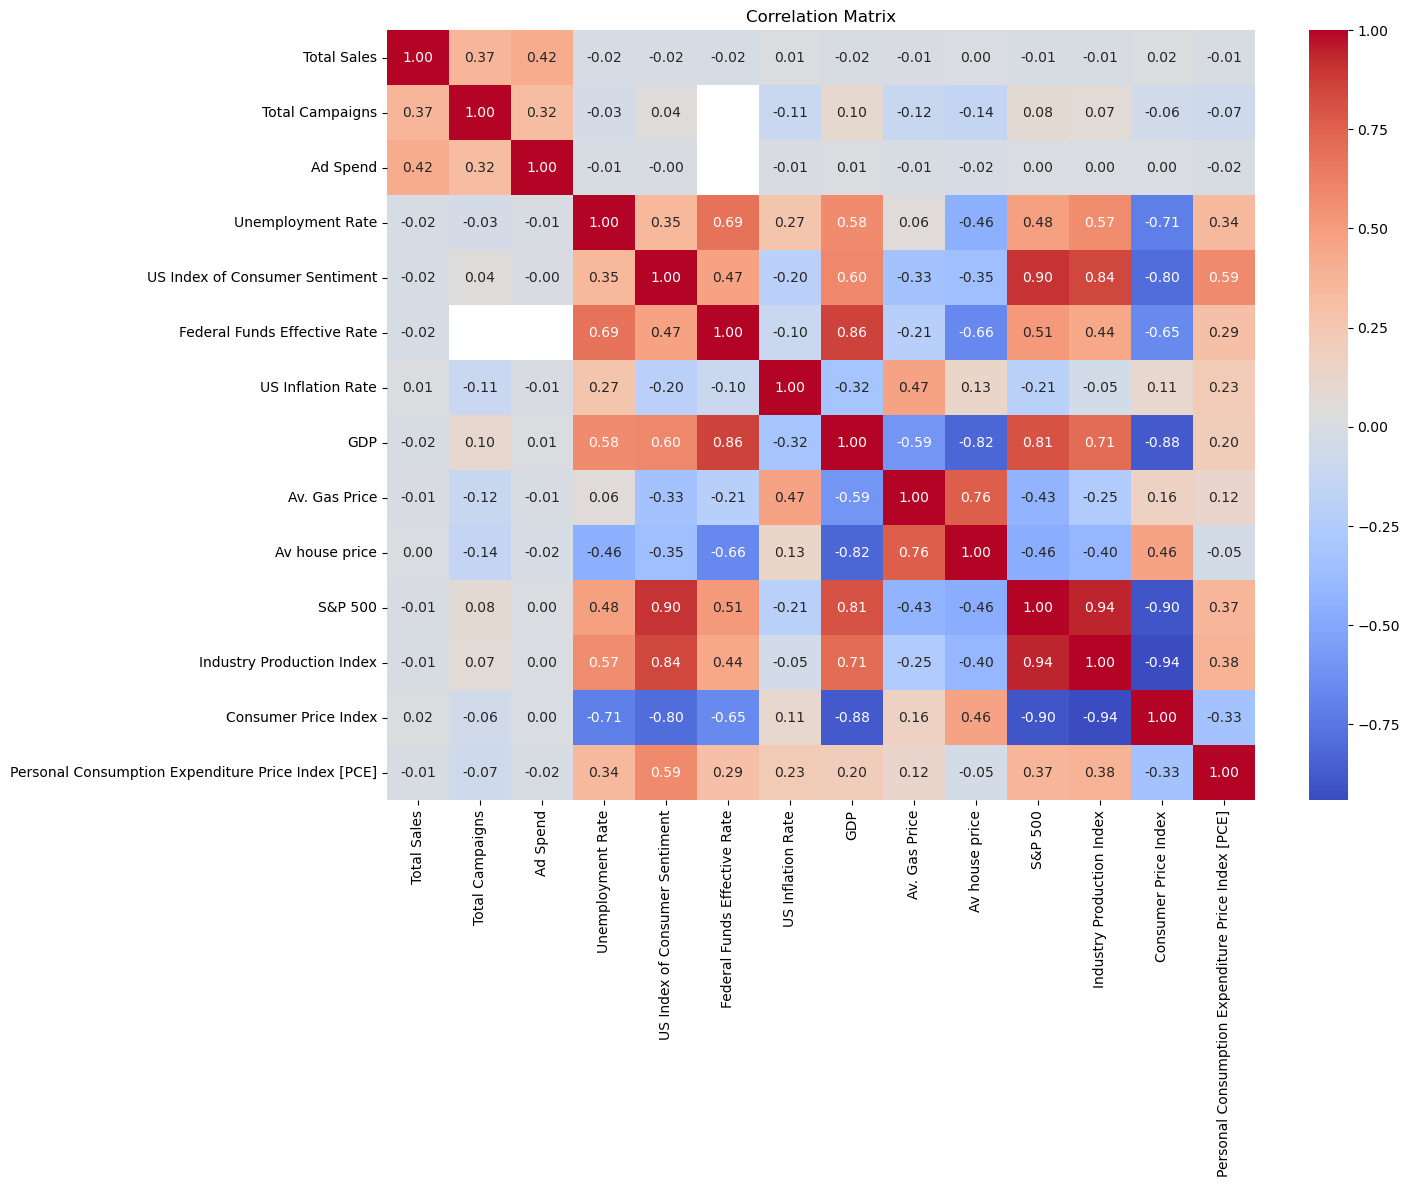

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# List of numerical variables to include in the correlation matrix
variables = [
    'Total Sales',
    'Total Campaigns',
    'Ad Spend',
    'Unemployment Rate',
    'US Index of Consumer Sentiment',
    'Federal Funds Effective Rate',
    'US Inflation Rate',
    'GDP',
    'Av. Gas Price',
    'Av house price',
    'S&P 500',
    'Industry Production Index',
    'Consumer Price Index',
    'Personal Consumption Expenditure Price Index [PCE]'
]

# Selecting the specified columns
df_selected = df[variables]

# Compute the correlation matrix
correlation_matrix = df_selected.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


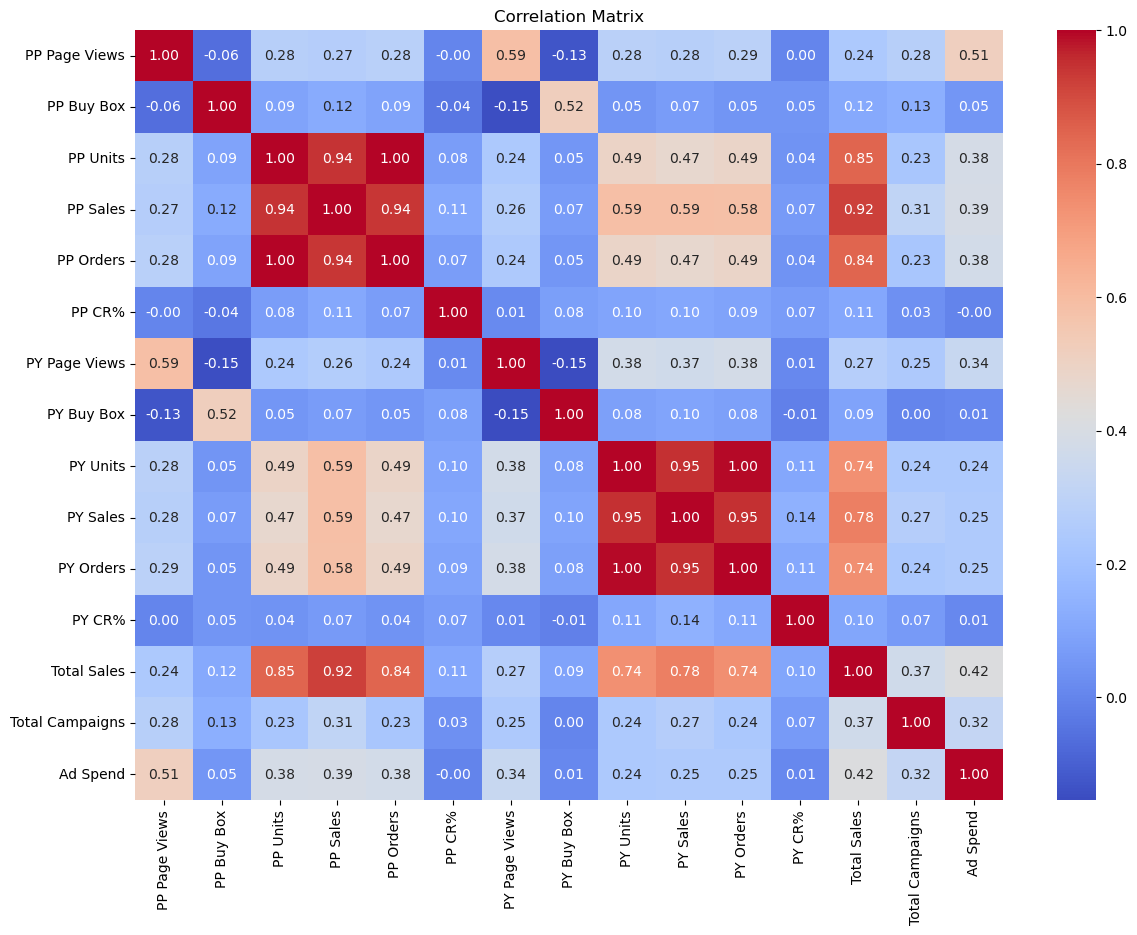

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# List of numerical variables to include in the correlation matrix
variables = [
    'PP Page Views',
    'PP Buy Box',
    'PP Units',
    'PP Sales',
    'PP Orders',
    'PP CR%',
    'PY Page Views',
    'PY Buy Box',
    'PY Units',
    'PY Sales',
    'PY Orders',
    'PY CR%',
    'Total Sales',
    'Total Campaigns',
    'Ad Spend'
]

# Selecting the specified columns
df_selected = df[variables]

# Compute the correlation matrix
correlation_matrix = df_selected.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


**Random Forest**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Selecting the specified variables
variables = [
    'PP Buy Box', 'PP Units', 'PP Sales', 'PP Orders', 'PP CR%',
    'PY Page Views', 'PY Buy Box', 'PY Units', 'PY Sales', 'PY Orders', 'PY CR%',
    'Total Sales', 'Total Campaigns', 'Ad Spend'
]

# Splitting the dataset into features (X) and target variable (y)
X = df[variables].dropna()  # Features
y = X['Total Sales']  # Target variable
X = X.drop(columns=['Total Sales'])  # Remove target from features

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiating the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model on the training data
rf_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 114574.82204237772
R^2 Score: 0.9241139771438511


**Adding Categorical Variables with One Hot Encoding**

In [15]:
from sklearn.preprocessing import OneHotEncoder

# Selecting the specified variables including categorical variables
variables_with_categorical = [
    'PP Buy Box', 'PP Units', 'PP Sales', 'PP Orders', 'PP CR%',
    'PY Page Views', 'PY Buy Box', 'PY Units', 'PY Sales', 'PY Orders', 'PY CR%',
    'Total Sales', 'Total Campaigns', 'Ad Spend', 
    'Brand', 'Level', 'Product Trend', 'Month'
]

# Dropping rows with missing values and selecting features and target variable
df_cleaned = df[variables_with_categorical].dropna()

# Separate features and target variable
X = df_cleaned.drop(columns=['Total Sales'])  # Features
y = df_cleaned['Total Sales']  # Target variable

# Resetting index to ensure consistency between X and y
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# One-hot encoding for categorical variables
categorical_cols = ['Brand', 'Level', 'Product Trend', 'Month']
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(X[categorical_cols])
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)

# Drop original categorical columns from X and concatenate encoded columns
X = X.drop(columns=categorical_cols)
X = pd.concat([X, X_encoded_df], axis=1)

# Check the number of samples in X and y
print("Number of samples in X:", len(X))
print("Number of samples in y:", len(y))

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model's performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R^2 Score:", r2_rf)


Number of samples in X: 29540
Number of samples in y: 29540


C:\Users\002736125\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Random Forest Mean Squared Error: 111689.37959652762
Random Forest R^2 Score: 0.926025084204658


In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Calculate R-squared (R^2) score
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R^2 Score:", r2_rf)


Random Forest Mean Squared Error: 111689.37959652762
Random Forest R^2 Score: 0.926025084204658


**XGBoost**

In [10]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Selecting the specified variables
variables = [
    'PP Buy Box', 'PP Units', 'PP Sales', 'PP Orders', 'PP CR%',
    'PY Page Views', 'PY Buy Box', 'PY Units', 'PY Sales', 'PY Orders', 'PY CR%',
    'Total Sales', 'Total Campaigns', 'Ad Spend'
]

# Splitting the dataset into features (X) and target variable (y)
X = df[variables].dropna()  # Features
y = X['Total Sales']  # Target variable
X = X.drop(columns=['Total Sales'])  # Remove target from features

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the XGBoost regressor
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model's performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Mean Squared Error:", mse_xgb)
print("XGBoost R^2 Score:", r2_xgb)


XGBoost Mean Squared Error: 129401.75968061213
XGBoost R^2 Score: 0.9142936928226973


In [17]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Selecting the specified variables including categorical variables
variables_with_categorical = [
    'PP Buy Box', 'PP Units', 'PP Sales', 'PP Orders', 'PP CR%',
    'PY Page Views', 'PY Buy Box', 'PY Units', 'PY Sales', 'PY Orders', 'PY CR%',
    'Total Sales', 'Total Campaigns', 'Ad Spend', 
    'Brand', 'Level', 'Product Trend', 'Month'
]

# Dropping rows with missing values and selecting features and target variable
df_cleaned = df[variables_with_categorical].dropna()

# Separate features and target variable
X = df_cleaned.drop(columns=['Total Sales'])  # Features
y = df_cleaned['Total Sales']  # Target variable

# Resetting index to ensure consistency between X and y
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# One-hot encoding for categorical variables
categorical_cols = ['Brand', 'Level', 'Product Trend', 'Month']
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(X[categorical_cols])
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)

# Drop original categorical columns from X and concatenate encoded columns
X = X.drop(columns=categorical_cols)
X = pd.concat([X, X_encoded_df], axis=1)

# Check the number of samples in X and y
print("Number of samples in X:", len(X))
print("Number of samples in y:", len(y))

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model's performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Mean Squared Error:", mse_xgb)
print("XGBoost R^2 Score:", r2_xgb)


C:\Users\002736125\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Number of samples in X: 29540
Number of samples in y: 29540
XGBoost Mean Squared Error: 129636.81431222713
XGBoost R^2 Score: 0.9141380097430363


**Support Vector Regression**

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Selecting the specified variables
variables_to_use = [
    'PP Buy Box', 'PP Units', 'PP Sales', 'PP Orders', 'PP CR%',
    'PY Page Views', 'PY Buy Box', 'PY Units', 'PY Sales', 'PY Orders', 'PY CR%',
    'Total Sales', 'Total Campaigns', 'Ad Spend'
]

# Dropping rows with missing values and selecting features and target variable
df_cleaned = df[variables_to_use].dropna()
X = df_cleaned.drop(columns=['Total Sales'])  # Features
y = df_cleaned['Total Sales']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the SVR model
svr_model = SVR(kernel='rbf')  # You can choose different kernels like 'linear', 'poly', 'sigmoid', etc.

# Train the model on the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model's performance
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("SVR Mean Squared Error:", mse_svr)
print("SVR R^2 Score:", r2_svr)


SVR Mean Squared Error: 1274767.7866889548
SVR R^2 Score: 0.1556866013618574


**Gradient Boosting**

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Selecting the specified variables
variables_to_use = [
    'PP Buy Box', 'PP Units', 'PP Sales', 'PP Orders', 'PP CR%',
    'PY Page Views', 'PY Buy Box', 'PY Units', 'PY Sales', 'PY Orders', 'PY CR%',
    'Total Sales', 'Total Campaigns', 'Ad Spend'
]

# Dropping rows with missing values and selecting features and target variable
df_cleaned = df[variables_to_use].dropna()
X = df_cleaned.drop(columns=['Total Sales'])  # Features
y = df_cleaned['Total Sales']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model's performance
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Mean Squared Error:", mse_gb)
print("Gradient Boosting R^2 Score:", r2_gb)


Gradient Boosting Mean Squared Error: 68113.08540446118
Gradient Boosting R^2 Score: 0.9548868498011372


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Selecting the specified variables
variables_to_use = [
    'PP Buy Box', 'PP Units', 'PP Sales', 'PP Orders', 'PP CR%',
    'PY Page Views', 'PY Buy Box', 'PY Units', 'PY Sales', 'PY Orders', 'PY CR%',
    'Total Sales', 'Total Campaigns', 'Ad Spend'
]

# Dropping rows with missing values and selecting features and target variable
df_cleaned = df[variables_to_use].dropna()
X = df_cleaned.drop(columns=['Total Sales'])  # Features
y = df_cleaned['Total Sales']  # Target variable

# Normalize the numerical variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Instantiate the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model's performance
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Mean Squared Error:", mse_gb)
print("Gradient Boosting R^2 Score:", r2_gb)


Gradient Boosting Mean Squared Error: 68295.0420395724
Gradient Boosting R^2 Score: 0.954766334969652


**Gradient Boosting with Hyperparamter Tuning**

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

# Assuming you already have your dataset loaded and processed

# Selecting the specified variables
variables_to_use = [
    'PP Units', 'PP Sales', 'PP Orders',
    'PY Units', 'PY Sales', 'PY Orders',
    'Total Sales'  # Assuming this is your target variable
]

# Dropping rows with missing values and selecting features and target variable
df_cleaned = df[variables_to_use].dropna()
X = df_cleaned.drop(columns=['Total Sales'])  # Features
y = df_cleaned['Total Sales']  # Target variable

# Normalize the numerical variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Instantiate the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


KeyboardInterrupt: 

**Support Vector Machine**

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Selecting the specified variables
variables_to_use = [
    'PP Buy Box', 'PP Units', 'PP Sales', 'PP Orders', 'PP CR%',
    'PY Page Views', 'PY Buy Box', 'PY Units', 'PY Sales', 'PY Orders', 'PY CR%',
    'Total Sales', 'Total Campaigns', 'Ad Spend'
]

# Dropping rows with missing values and selecting features and target variable
df_cleaned = df[variables_to_use].dropna()
X = df_cleaned.drop(columns=['Total Sales'])  # Features
y = df_cleaned['Total Sales']  # Target variable

# Normalize the numerical variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Instantiate the Support Vector Machine Regressor model
svm_model = SVR()

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model's performance
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print("Support Vector Machine Mean Squared Error:", mse_svm)
print("Support Vector Machine R^2 Score:", r2_svm)


Support Vector Machine Mean Squared Error: 799135.2650936327
Support Vector Machine R^2 Score: 0.12287116817316657


**Streamlit App using Gradient Boosting Model**

In [5]:
import streamlit as st
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor

# Selecting the specified variables
variables_to_use = [
    'PP Buy Box', 'PP Units', 'PP Sales', 'PP Orders', 'PP CR%',
    'PY Page Views', 'PY Buy Box', 'PY Units', 'PY Sales', 'PY Orders', 'PY CR%',
    'Total Sales', 'Total Campaigns', 'Ad Spend'
]

# Dropping rows with missing values and selecting features and target variable
df_cleaned = df[variables_to_use].dropna()
X = df_cleaned.drop(columns=['Total Sales'])  # Features
y = df_cleaned['Total Sales']  # Target variable

# Instantiate the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_model.fit(X, y)

# Define the Streamlit app
def main():
    st.title("Total Sales Prediction App")
    
    # Add input fields for variables
    pp_units = st.number_input("Enter PP Units", value=0)
    pp_sales = st.number_input("Enter PP Sales", value=0)
    # Add input fields for other variables...
    
    # Make predictions
    if st.button("Predict Total Sales"):
        input_data = [[pp_units, pp_sales]]  # Add other input variables as needed
        prediction = gb_model.predict(input_data)
        st.success(f"Predicted Total Sales: {prediction[0]}")

if __name__ == "__main__":
    main()


2024-06-07 13:20:38.609 
  command:

    streamlit run C:\Users\002736125\AppData\Local\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-06-07 13:20:38.609 Session state does not function when running a script without `streamlit run`


In [8]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the dataset
variables_to_use = [
    'PP Buy Box', 'PP Units', 'PP Sales', 'PP Orders', 'PP CR%',
    'PY Page Views', 'PY Buy Box', 'PY Units', 'PY Sales', 'PY Orders', 'PY CR%',
    'Total Sales', 'Total Campaigns', 'Ad Spend'
]

# Selecting the specified variables
selected_data = df[variables_to_use]

# Calculate the 75th percentile for each variable
percentile_75 = selected_data.quantile(0.95)

# Print the results
print("75th Percentile for Numerical Variables:")
print(percentile_75)


75th Percentile for Numerical Variables:
PP Buy Box           1.000
PP Units            10.000
PP Sales           385.000
PP Orders            9.000
PP CR%               0.200
PY Page Views      289.000
PY Buy Box           1.000
PY Units            10.000
PY Sales           405.000
PY Orders            9.000
PY CR%               0.200
Total Sales        675.000
Total Campaigns    162.000
Ad Spend            39.133
Name: 0.95, dtype: float64
